# DATA EXPLORATORY Analysis ON COVID CASES!

In [1]:
# What's going right now ! 
# We connect to https://opencovid.ca/api/ as an active API to fetch online data
import requests
import json
import numpy as np 
import matplotlib.pyplot as plt 
import datetime
import pandas as pd
import tensorflow as tf 
response = requests.get('https://api.opencovid.ca/')
data = json.loads(response.text)
data =response.json()

In [2]:
# Last update of the data! 
time = list(data.values())
Last_update = time[1]
print(Last_update)

2022-03-18 21:38 EDT


In [3]:
data_list = list(data.values())
data_dict = dict(data_list[0][0])
active_cases = data_dict['active_cases']
death = data_dict['deaths']
recovered = data_dict['recovered']
testing = data_dict['testing']
cases = data_dict['cases']
active_cases

109411

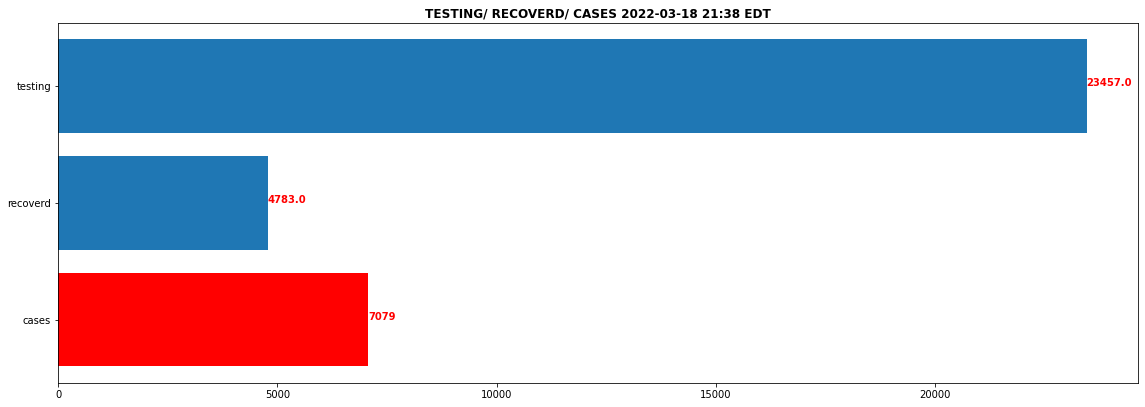

In [4]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
leg = ['cases','recoverd','testing']
bar = [cases, recovered, testing ]
ax.barh(leg,bar)
ax.barh('cases',cases, color='red')
for i, v in enumerate(bar): 
    ax.text( v, i,str(v), color='red', fontweight = 'bold')

plt.title("TESTING/ RECOVERD/ CASES " + str(Last_update), fontweight = 'bold' )
plt.show()

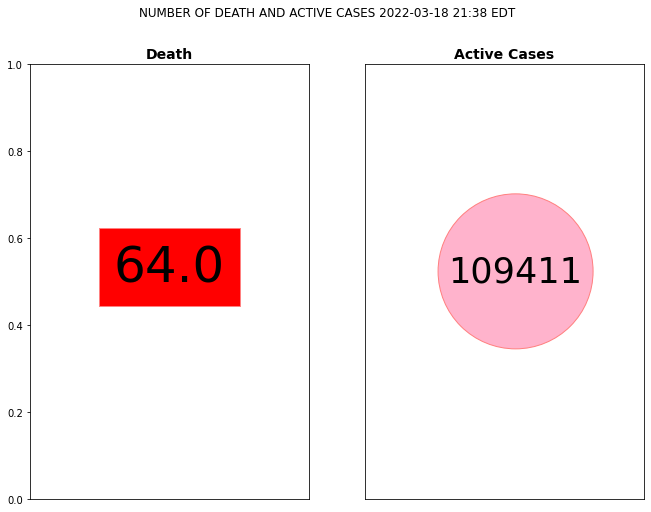

In [5]:
plt.figure(figsize=(11,8))
plt.suptitle("NUMBER OF DEATH AND ACTIVE CASES " +str (Last_update))
plt.subplot(1,2,1)
plt.text(0.3, 0.5, death, size=50,
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0, 0),
                   )
         )
plt.title('Death', fontweight='bold', fontsize = 14)
plt.xticks([])
plt.subplot(1,2,2)
plt.text(0.3, 0.5, active_cases, size=35,
         bbox=dict(boxstyle="circle",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.7, 0.8),
                   )
         )
plt.title('Active Cases', fontweight='bold', fontsize = 14)
plt.xticks([])
plt.yticks([])
plt.show()

## Past X days in British Columbia, Canada 

In [6]:
from datetime import date, timedelta
NUMBER_DAYS = 750
PROVINCE = "BC"
today_date = date.today().isoformat()
days_before  =  (date.today() - timedelta(days=NUMBER_DAYS)).isoformat()
response_BC = requests.get("https://api.opencovid.ca/timeseries?stat=cases&loc="+PROVINCE+"&after=" + str(days_before) + "&before=" +str(today_date))
data_BC = json.loads(response_BC.text)
data_BC = response_BC.json()

# WORKING WITH LIST OF DATA !
data_prov_BC = list(data_BC.values())
days = []
for i in range (NUMBER_DAYS): 
    days.append(data_prov_BC[0][i])

cases = [] 
dates=[]
for i in range(NUMBER_DAYS): 
    if days[i]['cases'] != 0 :
        cases.append(days[i]['cases'])
        dates.append(days[i]['date_report'])

cases_df = pd.DataFrame(cases, dates)
cases_df = cases_df.rename(columns={0: "NUMBER OF CASES BC"})
cases_df


,NUMBER OF CASES BC
29-02-2020,1
03-03-2020,4
04-03-2020,1
05-03-2020,8
07-03-2020,6
...,...
14-03-2022,689
15-03-2022,237
16-03-2022,174
17-03-2022,240


In [7]:
# From some days we have no cases ! that is because in those dates we have no testing and report. So we drop those 0 values ! 
cases_df.drop(cases_df.index[cases_df['NUMBER OF CASES BC'] == 0], inplace=True)

In [8]:
# Maximum number of cases!
max_df = cases_df.loc[cases_df["NUMBER OF CASES BC"] == cases_df.max(axis=0)[0]]
# Minimum number of cases! 
min_df  = cases_df.loc[cases_df["NUMBER OF CASES BC"] == cases_df.min(axis=0)[0]]
max_df, min_df

(            NUMBER OF CASES BC
 03-01-2022                9332,
             NUMBER OF CASES BC
 29-02-2020                   1
 04-03-2020                   1
 05-06-2020                   1
 03-08-2020                   1
 22-08-2020                   1)

In [9]:
max_df.index[0], min_df.index[0]

('03-01-2022', '29-02-2020')

In [10]:
max_df["NUMBER OF CASES BC"][0], min_df["NUMBER OF CASES BC"][0] 

(9332, 1)

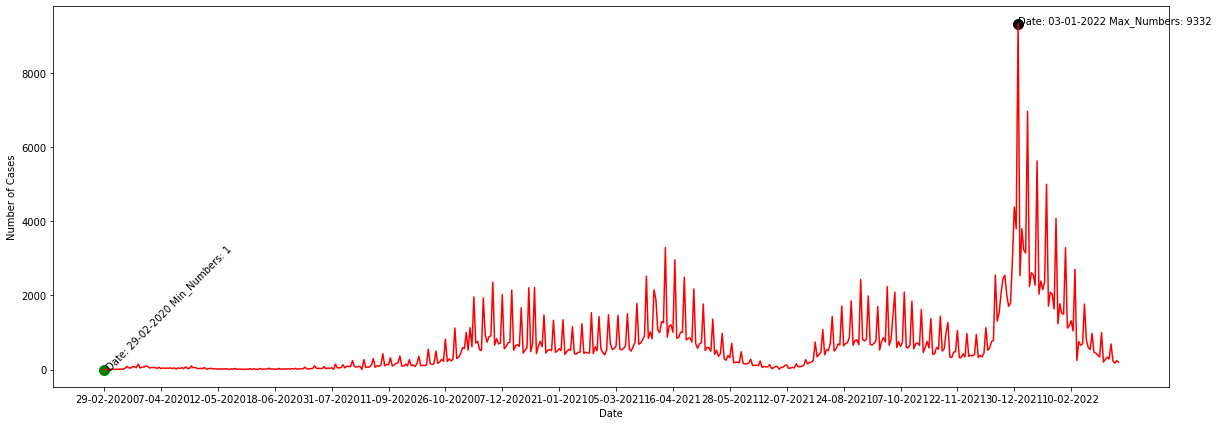

In [11]:
plt.figure(figsize=(20,7))
plt.plot(cases_df, color = "red")
plt.scatter(x = max_df.index[0], y = max_df["NUMBER OF CASES BC"][0], s=100, color="black")
max_title = "Date: " + str(max_df.index[0]) + " Max_Numbers: " +str(max_df["NUMBER OF CASES BC"][0])
plt.annotate(max_title, [max_df.index[0], max_df["NUMBER OF CASES BC"][0]])
plt.scatter(x = min_df.index[0], y =  min_df["NUMBER OF CASES BC"][0], s=100, color = 'Green')
min_title = "Date: " + str(min_df.index[0]) + " Min_Numbers: " + str(min_df["NUMBER OF CASES BC"][0])
plt.annotate(min_title,[min_df.index[0], min_df["NUMBER OF CASES BC"][0]], rotation=45)
plt.xticks(cases_df.index[0:-1:30])
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

<AxesSubplot:>

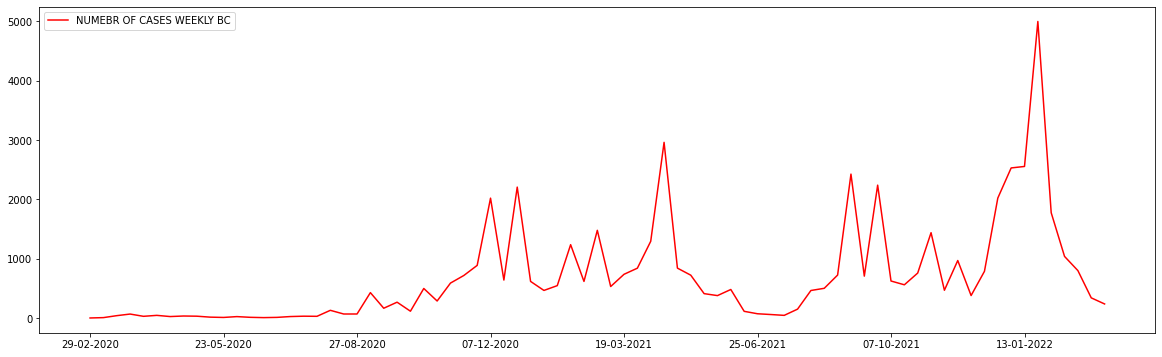

In [12]:
y = cases_df[0:-1:7]
weekly = y.rename(columns={"NUMBER OF CASES BC": "NUMEBR OF CASES WEEKLY BC"})
weekly.plot(figsize= (20,6), color="red")

## First step spilit data to Train and Test 
it's important to consider we cannot split data to train/test randomly. In time series data we need to consider a random point of the time and everything before that time consider as train and everything after that point consider as test 

In [13]:
# we consider the first split_percentage of size of the dataset as training
SPLIT_PERC = 0.7  
split_size = int(SPLIT_PERC * len(cases_df))
time_span_train = dates[:split_size]
num_case_train = cases[:split_size]
x_train, y_train  = time_span_train, num_case_train
x_test, y_test = dates[split_size:], cases[split_size:]
len(x_train), len(x_test), len(y_train), len(y_test)

(375, 161, 375, 161)

C:\Users\hamid\AppData\Local\Temp\ipykernel_15236\2778730608.py:5: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


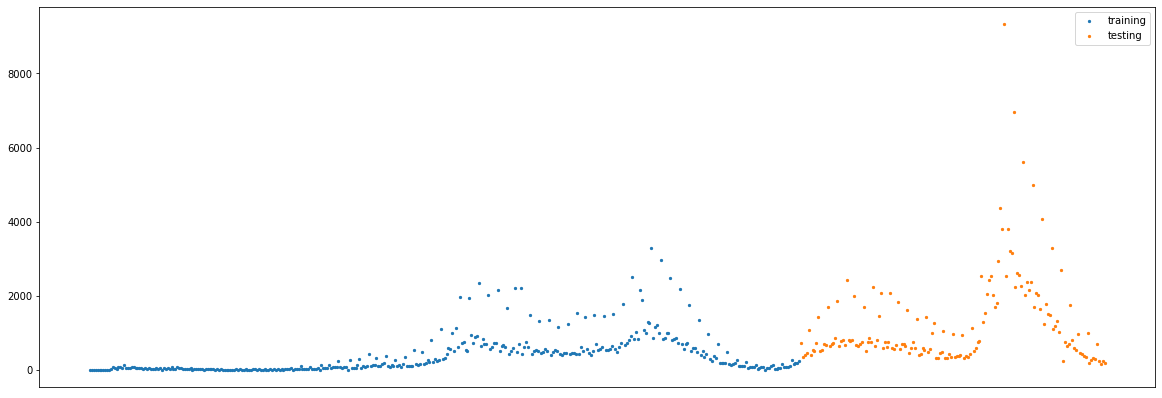

In [14]:
plt.figure(figsize=(20,7))
plt.scatter(x=x_train, y=y_train, s=5, label = "training")
plt.scatter(x=x_test, y=y_test, s=5, label = "testing")
plt.legend()
plt.xticks([])
plt.show()

# Turn time seris to supervised learning by windowing (preprocessing)

In [15]:
# Need a function to create a window and horizon 
# window_size is the number of days of data that we consider and horizon is the number of days that we want to predict. 
# Tensorflow make our job easier, by offereing tf.keras.utils.timeseries_dataset_from_array 
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array 
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/TimeseriesGenerator
# These functions take in a sequence of data-points gathered at equal intervals, along with time series parameters such 
# as length of the sequences/windows, spacing between two sequence/windows, etc., to produce batches of timeseries inputs and targets.

In [16]:
# so for the review we have data (cases), and dates(time) as: 
dates[0:7], cases[0:7], len(dates), len(cases), type(dates), type(cases)

(['29-02-2020',
  '03-03-2020',
  '04-03-2020',
  '05-03-2020',
  '07-03-2020',
  '09-03-2020',
  '10-03-2020'],
 [1, 4, 1, 8, 6, 5, 7],
 536,
 536,
 list,
 list)

In [17]:
import tensorflow as tf 
from keras.preprocessing.sequence import TimeseriesGenerator
# """
# tf.keras.utils.timeseries_dataset_from_array(
#     data, targets, sequence_length, sequence_stride=1, sampling_rate=1,
#     batch_size=128, shuffle=False, seed=None, start_index=None, end_index=None)
# """

# need to turn data to numpy array 
inputs   = np.array(dates)
labels = np.array(cases)

# we want to predict next day cases, by considerting past 7 days.
dataset = TimeseriesGenerator(labels, labels, length=7, shuffle=False, stride=1, batch_size=1)


In [18]:
dataset

In [19]:
# The first 10 windows 
for i in range(10): 
    print(dataset[i])

(array([[1, 4, 1, 8, 6, 5, 7]]), array([7]))
(array([[4, 1, 8, 6, 5, 7, 7]]), array([7]))
(array([[1, 8, 6, 5, 7, 7, 7]]), array([11]))
(array([[ 8,  6,  5,  7,  7,  7, 11]]), array([9]))
(array([[ 6,  5,  7,  7,  7, 11,  9]]), array([30]))
(array([[ 5,  7,  7,  7, 11,  9, 30]]), array([83]))
(array([[ 7,  7,  7, 11,  9, 30, 83]]), array([45]))
(array([[ 7,  7, 11,  9, 30, 83, 45]]), array([40]))
(array([[ 7, 11,  9, 30, 83, 45, 40]]), array([77]))
(array([[11,  9, 30, 83, 45, 40, 77]]), array([76]))


In [20]:
# the last 10 windows ! 
for i in range (10): 
    print(dataset[i-10])

(array([[997, 200, 274, 336, 288, 689, 237]]), array([174]))
(array([[200, 274, 336, 288, 689, 237, 174]]), array([240]))
(array([[274, 336, 288, 689, 237, 174, 240]]), array([199]))
(array([], shape=(1, 0), dtype=int32), array([1]))
(array([], shape=(1, 0), dtype=int32), array([4]))
(array([], shape=(1, 0), dtype=int32), array([1]))
(array([], shape=(1, 0), dtype=int32), array([8]))
(array([], shape=(1, 0), dtype=int32), array([6]))
(array([], shape=(1, 0), dtype=int32), array([5]))
(array([], shape=(1, 0), dtype=int32), array([7]))


In [21]:
data = []
for i in range(len(dataset)): 
    data.append(dataset[i][0])
    
target = []
for i in range(len(dataset)): 
    target.append(dataset[i][1])

In [22]:
# Create training and testing dataset by spliting the Windows ! 

def train_test_splits(data, target, split_rate = 0.2): 
    """
        Split data (Windows ) and target(Numebr of cases) 
        to training and testing datasets!
    
    """
    split_size = int(len(data) * (1-split_rate))

    train_windows = data[:split_size]
    train_labels = target[:split_size]
    test_windows  = data[split_size :]
    test_lables = target[split_size:]

    return tf.squeeze(train_windows), tf.squeeze(test_windows), tf.squeeze(train_labels), tf.squeeze(test_lables)

train_windows, test_windows, train_labels, test_lables = train_test_splits(data=data, target=target, split_rate=0.2)


## PREDICTION WITH ML ALGORITHMS 

In [23]:
# SAVE different models! 
import os

# Create a ModelCheckpoint callback  
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [24]:
# Create ML models --> Basic to Complicated !
# First just one dense layer with 128 nodes

import tensorflow as tf 
from keras.models import Sequential
from keras import layers

# Random seed for regenarating 
tf.random.set_seed(42)

HORIZON = 1 # Want to find the number of cases in the next day 
#Model_1 
model_1  = Sequential([    
    layers.Dense(128),
    layers.Activation("relu"), 
    layers.Dense(HORIZON, tf.keras.activations.linear)
], name="model_1")

# Complie the model 
model_1.compile(loss = tf.keras.losses.MAE, optimizer=tf.keras.optimizers.Adam(),
                metrics = ['mae'])

# Fit the model 
model_1.fit(x=train_windows, y=train_labels, 
            batch_size=128, epochs=100, validation_data=(test_windows, test_lables),callbacks=[create_model_checkpoint(model_name=model_1._name)])


Epoch 1/100
4/4 [==============================] - 1s 208ms/step - loss: 265.3532 - mae: 265.3532 - val_loss: 640.2498 - val_mae: 640.2498
Epoch 2/100
4/4 [==============================] - 1s 193ms/step - loss: 205.9478 - mae: 205.9478 - val_loss: 608.3790 - val_mae: 608.3790
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 203.6014 - mae: 203.6014 - val_loss: 620.8149 - val_mae: 620.8149
Epoch 4/100
4/4 [==============================] - 1s 201ms/step - loss: 199.2277 - mae: 199.2277 - val_loss: 580.6075 - val_mae: 580.6075
Epoch 5/100
4/4 [==============================] - 0s 161ms/step - loss: 184.3898 - mae: 184.3898 - val_loss: 538.2545 - val_mae: 538.2545
Epoch 6/100
4/4 [==============================] - 1s 254ms/step - loss: 178.1779 - mae: 178.1779 - val_loss: 526.0103 - val_mae: 526.0103
Epoch 7/100
4/4 [==============================] - 1s 223ms/step - loss: 175.8092 - mae: 175.8092 - val_loss: 514.7875 - val_mae: 514.7875
Epoch 8/100
4/4 [===========

In [25]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Evaluate on the test data 
model_1 = tf.keras.models.load_model('model_experiments/model_1')
model_1.evaluate(test_windows, test_lables)

4/4 [==============================] - 0s 3ms/step - loss: 327.5684 - mae: 327.5684


[327.5683898925781, 327.5683898925781]

In [27]:
# We want to predict the numebr of covid cases based on the model that we trained

def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [28]:
# The model predicition for the test set 
pred = make_preds(model=model_1, input_data = test_windows)


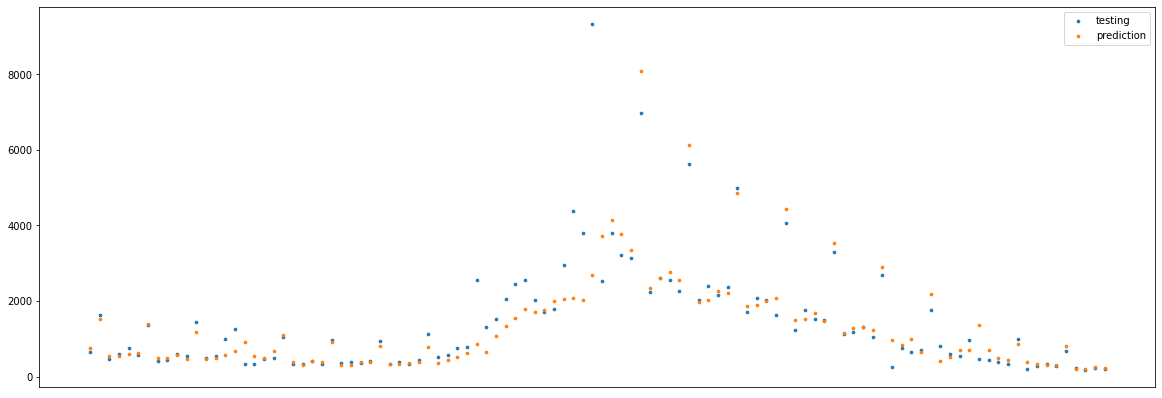

In [29]:
# Lets plot the performance of model_1 predicition compare to the test set 
x = []
for i in range(len(test_lables)):
    x.append(i)

plt.figure(figsize=(20,7))
plt.scatter(x=x, y=test_lables, s=7, label = "testing")
plt.scatter(x=x, y=pred, s=7, label = "prediction")
plt.legend()
plt.xticks([])
plt.show()

The time series that we have is autocorrelated, it means the value in t+1 is quite close to the value in time t 

In [30]:
# Second model this time instead of 7 days we consider windows with size of 30 days 
dataset = TimeseriesGenerator(labels, labels, length=30, shuffle=False, stride=1, batch_size=1)
# Data is ready with windows of 30 days 
data = []
for i in range(len(dataset)): 
    data.append(dataset[i][0])
    
target = []
for i in range(len(dataset)): 
    target.append(dataset[i][1])

# Train, Test split 
train_windows, test_windows, train_labels, test_lables = train_test_splits(data=data, target=target, split_rate=0.2)

# Create model_1 with new input data 
HORIZON = 1 # Want to find the number of cases in the next day 
model_2  = Sequential([    
    layers.Dense(128),
    layers.Activation("relu"), 
    layers.Dense(HORIZON, tf.keras.activations.linear)
], name="model_2")

# Complie the model 
model_2.compile(loss = tf.keras.losses.MAE, optimizer=tf.keras.optimizers.Adam(),
                metrics = ['mae'])

# Fit the model 
model_2.fit(x=train_windows, y=train_labels, 
            batch_size=128, epochs=100, validation_data=(test_windows, test_lables), callbacks=[create_model_checkpoint(model_name=model_2._name)])


Epoch 1/100
4/4 [==============================] - 1s 289ms/step - loss: 456.4938 - mae: 456.4938 - val_loss: 989.3077 - val_mae: 989.3077
Epoch 2/100
4/4 [==============================] - 0s 23ms/step - loss: 278.7174 - mae: 278.7174 - val_loss: 1148.0972 - val_mae: 1148.0972
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 297.9203 - mae: 297.9203 - val_loss: 1098.9730 - val_mae: 1098.9730
Epoch 4/100
4/4 [==============================] - 1s 317ms/step - loss: 272.5194 - mae: 272.5194 - val_loss: 859.1273 - val_mae: 859.1273
Epoch 5/100
4/4 [==============================] - 0s 165ms/step - loss: 227.8038 - mae: 227.8038 - val_loss: 698.7470 - val_mae: 698.7470
Epoch 6/100
4/4 [==============================] - 0s 159ms/step - loss: 222.3120 - mae: 222.3120 - val_loss: 638.5682 - val_mae: 638.5682
Epoch 7/100
4/4 [==============================] - 0s 162ms/step - loss: 201.8093 - mae: 201.8093 - val_loss: 602.5450 - val_mae: 602.5450
Epoch 8/100
4/4 [========

In [31]:
model_2 = tf.keras.models.load_model('model_experiments/model_2')
model_2.evaluate(test_windows, test_lables)

4/4 [==============================] - 0s 2ms/step - loss: 462.7687 - mae: 462.7687


[462.7686767578125, 462.7686767578125]

# Long Short-Term Memory (LSTM) for learning sequential data 

In [48]:
# For this model, we consider WINDOWS=7 and HORIZON = 1 (consider number of covid cases for 1 week and predict the next day). 
HORIZON = 1 
WINDOW = 7
dataset = TimeseriesGenerator(labels, labels, length=WINDOW, shuffle=False, stride=1, batch_size=1) 
data = []
for i in range(len(dataset)): 
    data.append(dataset[i][0])
    
target = []
for i in range(len(dataset)): 
    target.append(dataset[i][1])
train_windows, test_windows, train_labels, test_lables = train_test_splits(data=data, target=target, split_rate=0.2)


In [49]:
np.shape(train_windows), np.shape(train_labels), np.shape(test_windows), np.shape(test_lables)

(TensorShape([423, 7]),
 TensorShape([423]),
 TensorShape([106, 7]),
 TensorShape([106]))

In [96]:
# https://www.tensorflow.org/tutorials/structured_data/time_series 

# LSTM layers take data with this shape [batch, timesteps, feature].

tf.random.set_seed(42)  # regeneration

inputs = layers.Input(shape=WINDOW)
x = tf.expand_dims(inputs, axis= 1) # Reshape the input layer to 3D layer (NONE, 1, 7)
x = layers.LSTM(128, activation="relu", return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
x = layers.Dense(32)(x)
output = layers.Dense(HORIZON)(x)

model_3 = tf.keras.Model(inputs=inputs, outputs=output, name="model_3")

# compile the model 
model_3.compile(loss = tf.keras.losses.MAE, optimizer=tf.keras.optimizers.Adam(),metrics = ['mae'])

#Fit the model 
model_3.fit(x=train_windows, y=train_labels, batch_size=128, epochs=100,
            validation_data=(test_windows, test_lables),callbacks=[create_model_checkpoint(model_name=model_3._name)])

model_3.summary

Epoch 1/100
1/4 [======>.......................] - ETA: 4s - loss: 444.0300 - mae: 444.0300INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 4s 828ms/step - loss: 470.6777 - mae: 470.6777 - val_loss: 1377.0109 - val_mae: 1377.0109
Epoch 2/100
1/4 [======>.......................] - ETA: 0s - loss: 468.7792 - mae: 468.7792INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 2s 794ms/step - loss: 438.0701 - mae: 438.0701 - val_loss: 1248.2079 - val_mae: 1248.2079
Epoch 3/100
1/4 [======>.......................] - ETA: 0s - loss: 402.1752 - mae: 402.1752INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 2s 777ms/step - loss: 383.9459 - mae: 383.9459 - val_loss: 972.3392 - val_mae: 972.3392
Epoch 4/100
1/4 [======>.......................] - ETA: 0s - loss: 298.4882 - mae: 298.4882INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 4s 1s/step - loss: 273.4836 - mae: 273.4836 - val_loss: 571.8389 - val_mae: 571.8389
Epoch 5/100
1/4 [======>.......................] - ETA: 0s - loss: 185.2380 - mae: 185.2380INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 3s 846ms/step - loss: 178.7853 - mae: 178.7853 - val_loss: 516.1017 - val_mae: 516.1017
Epoch 6/100
4/4 [==============================] - 0s 25ms/step - loss: 181.3943 - mae: 181.3943 - val_loss: 537.3748 - val_mae: 537.3748
Epoch 7/100
1/4 [======>.......................] - ETA: 0s - loss: 171.5575 - mae: 171.5575INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 2s 775ms/step - loss: 150.8240 - mae: 150.8240 - val_loss: 378.4524 - val_mae: 378.4524
Epoch 8/100
1/4 [======>.......................] - ETA: 0s - loss: 128.9226 - mae: 128.9226INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 2s 740ms/step - loss: 118.9560 - mae: 118.9560 - val_loss: 357.9049 - val_mae: 357.9049
Epoch 9/100
4/4 [==============================] - 0s 26ms/step - loss: 116.6195 - mae: 116.6195 - val_loss: 367.0225 - val_mae: 367.0225
Epoch 10/100
4/4 [==============================] - 0s 26ms/step - loss: 111.0254 - mae: 111.0254 - val_loss: 385.9679 - val_mae: 385.9679
Epoch 11/100
4/4 [==============================] - 0s 25ms/step - loss: 106.8690 - mae: 106.8690 - val_loss: 366.8160 - val_mae: 366.8160
Epoch 12/100
1/4 [======>.......................] - ETA: 0s - loss: 103.1265 - mae: 103.1265INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 2s 775ms/step - loss: 101.3487 - mae: 101.3487 - val_loss: 340.7339 - val_mae: 340.7339
Epoch 13/100
4/4 [==============================] - 0s 26ms/step - loss: 100.0528 - mae: 100.0528 - val_loss: 355.9146 - val_mae: 355.9146
Epoch 14/100
4/4 [==============================] - 0s 25ms/step - loss: 99.4593 - mae: 99.4593 - val_loss: 358.9718 - val_mae: 358.9718
Epoch 15/100
4/4 [==============================] - 0s 27ms/step - loss: 95.7000 - mae: 95.7000 - val_loss: 347.4099 - val_mae: 347.4099
Epoch 16/100
4/4 [==============================] - 0s 27ms/step - loss: 96.9580 - mae: 96.9580 - val_loss: 360.3529 - val_mae: 360.3529
Epoch 17/100
4/4 [==============================] - 0s 26ms/step - loss: 95.2764 - mae: 95.2764 - val_loss: 342.6874 - val_mae: 342.6874
Epoch 18/100
4/4 [==============================] - 0s 25ms/step - loss: 94.0345 - mae: 94.0345 - val_loss: 346.9511 - val_mae: 346.9511
Epoch 19/100
4/4 [==============================]

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


4/4 [==============================] - 2s 780ms/step - loss: 83.1551 - mae: 83.1551 - val_loss: 307.0627 - val_mae: 307.0627
Epoch 33/100
4/4 [==============================] - 0s 26ms/step - loss: 88.2935 - mae: 88.2935 - val_loss: 348.0536 - val_mae: 348.0536
Epoch 34/100
4/4 [==============================] - 0s 26ms/step - loss: 90.2698 - mae: 90.2698 - val_loss: 381.1496 - val_mae: 381.1496
Epoch 35/100
4/4 [==============================] - 0s 24ms/step - loss: 89.9521 - mae: 89.9521 - val_loss: 334.7106 - val_mae: 334.7106
Epoch 36/100
4/4 [==============================] - 0s 24ms/step - loss: 88.4878 - mae: 88.4878 - val_loss: 328.3508 - val_mae: 328.3508
Epoch 37/100
4/4 [==============================] - 0s 25ms/step - loss: 86.5165 - mae: 86.5165 - val_loss: 344.7279 - val_mae: 344.7279
Epoch 38/100
4/4 [==============================] - 0s 22ms/step - loss: 85.3973 - mae: 85.3973 - val_loss: 398.6954 - val_mae: 398.6954
Epoch 39/100
4/4 [==============================] - 0

<bound method Model.summary of <keras.engine.functional.Functional object at 0x000002032E2E94E0>>

In [97]:
model_3 = tf.keras.models.load_model('model_experiments\model_3')
model_3.evaluate(test_windows, test_lables)

4/4 [==============================] - 0s 4ms/step - loss: 307.0627 - mae: 307.0627


[307.0627136230469, 307.0627136230469]

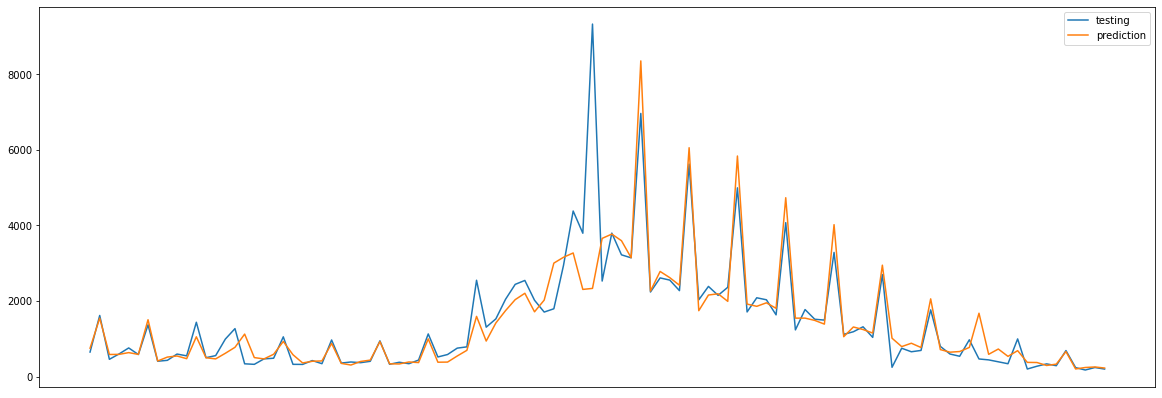

In [98]:
y_pred = model_3.predict(test_windows)
x = []
for i in range(len(test_lables)):
    x.append(i)
plt.figure(figsize=(20,7))
plt.plot(test_lables, label = "testing")
plt.plot(y_pred, label =  "prediction" )
plt.legend()
plt.xticks([])
plt.show()